## IMPORTING ALL THE PACKAGES 

In [46]:
import pandas as pd
import statistics as stats
import numpy as np
import time
import nltk
from nltk.corpus import stopwords
import gensim
import gensim.corpora as corpora
import random
#nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,TfidfTransformer
from string import punctuation
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#  READING DATASET 

In [2]:
dataset=pd.read_csv('train.csv')
questions=dataset.iloc[:,1:2].values#SEPERATING QUESTIONS#
targets=dataset.iloc[:,2:3].values#SEPERATING TARGETS#

In [3]:
#SEPERATING SINCERE AND INSINCERE QUESTIONS#
sincere_questions_index=[i for i in range(len(dataset)) if targets[i]==0]
insincere_questions_index=[i for i in range(len(dataset)) if targets[i]==1]


# VISUALISING DATA

In [4]:
#CALCULATING LENGTH OF EACH QUESTION#
length_questions=[len(question[0].split()) for question in questions]
maximum_length=max(length_questions)


In [5]:
#GROUPING IN BINS OF LENGTH 5#
num_bins=int((maximum_length/5)+1)
insincere=[0 for i in range(num_bins+1)]
group=[0 for i in range(num_bins+1)]
for i in range(0,len(length_questions)):
    if targets[i]==1:
        insincere[int(length_questions[i]/5)]=insincere[int(length_questions[i]/5)]+1
    group[int(length_questions[i]/5)]=group[int(length_questions[i]/5)]+1


In [6]:
#PERCENTAGE SINCERE AND  INSINCERE IN EACH BIN#
percentage_insincere=[0 for i in range(num_bins)]
for i in range(len(insincere)):
    if insincere[i]==0 or group[i]==0:
        percentage_insincere[i]=0
        break
    percentage_insincere[i]=round((insincere[i]*100)/group[i],2)
percentage_sincere=[0 for i in range(num_bins)]
for i in range(0,num_bins):
    percentage_sincere[i]=100-percentage_insincere[i]


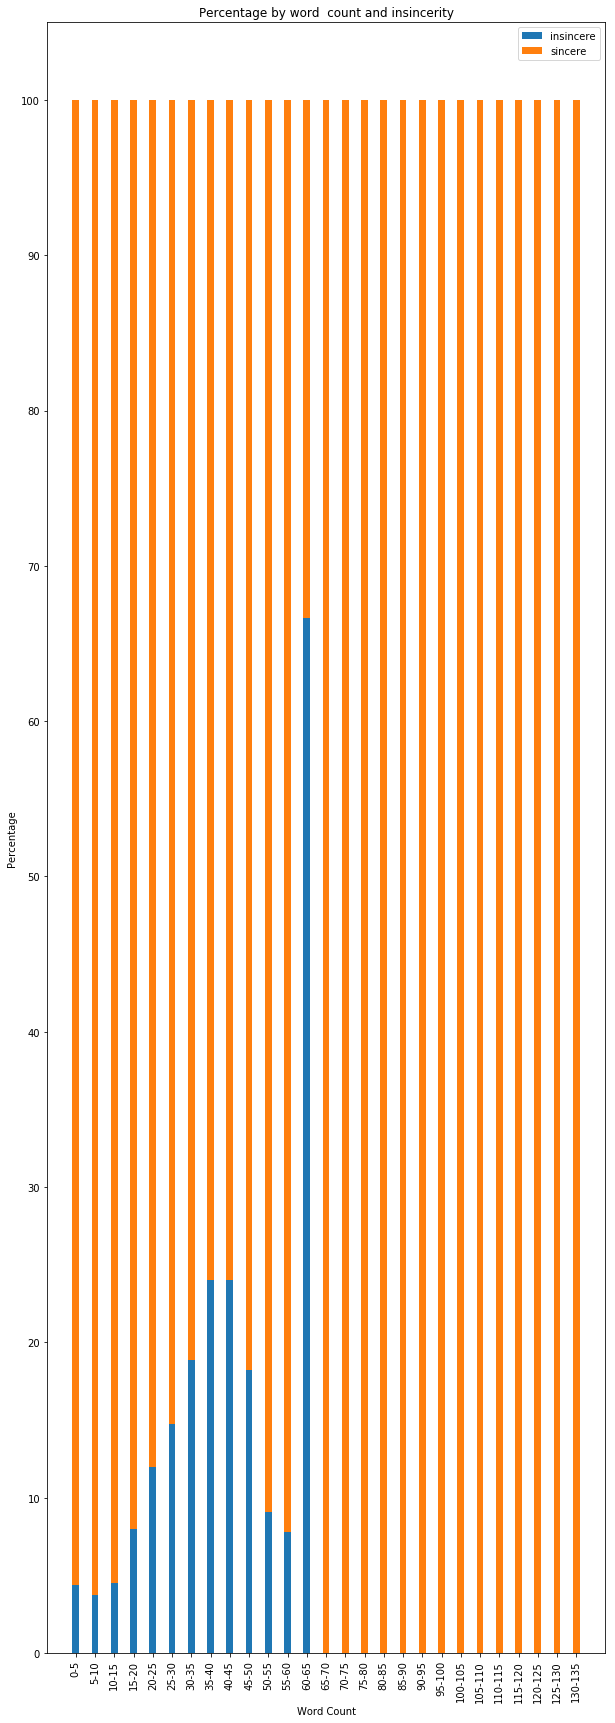

In [8]:
#PLOTTING#
s=[0 for i in range(num_bins)]
for i in range(num_bins):
    s[i]=str(i*5)+"-"+str((i+1)*5)
ind = np.arange(num_bins)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, percentage_insincere , width)
p2 = plt.bar(ind, percentage_sincere , width,
             bottom=percentage_insincere)


plt.ylabel('Percentage')
plt.xlabel('Word Count')
plt.title('Percentage by word  count and insincerity')
plt.xticks(ind,s,rotation='vertical')
plt.yticks(np.arange(0, 110, 10))
plt.legend((p1[0], p2[0]), ('insincere', 'sincere'))
plt.rcParams["figure.figsize"]=[10,30]
plt.show()


# CLEANING THE QUESTIONS

In [9]:
#REMOVING STOPWORDS FROM THE QUESTIONS#
stopword=set(stopwords.words('english'))
stopword_removed_questions=[]
for question in questions:
    q=question[0]
    q=q.lower()
    q=q.split()
    q=[words for words in q  if not words in stopword]
    q=' '.join(q)
    stopword_removed_questions.append(q)

In [10]:
# FUNCTION TO STEM AND LEMATIZE THE QUESTIONS#
#REMOVING STOP WORDS FROM  THE QUESTIONS#
def stopword_remove(questions):
    stopword=set(stopwords.words('english'))
    questions_clean=[]
    for question in questions:
        q=question[0]
        q=q.lower()
        q=q.split()
        q=[word for word in q if not word  in stopword ]
        q=' '.join(q)
        questions_clean.append(q)
    return questions_clean
#MORE CLEANING#
def cleaning(l):
    a=[]    
    b=[]
    c=[]
    #REMOVING PUNCTUATIONS#
    for i in l:
        a.append(''.join(c for c in i if c not in punctuation))
    #LEMMATIZING#
    wordnet_lemmatizer = WordNetLemmatizer()
    snowball_stemmer = SnowballStemmer('english')
    for q in a:
        word_tokens = nltk.word_tokenize(q)
        lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in word_tokens]
        b.append(lemmatized_word)
    #STEMMING#
    for q in b:
        word_tokens = nltk.word_tokenize(' '.join(q))
        stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
        c.append(stemmed_word)
    return c

# WORD CLOUD

In [21]:
#FOR SINCERE QUESTIONS FOR 1 LAKH QUESTIONS#
sincere_questions=[stopword_removed_questions[i] for i in sincere_questions_index]
sincere_1lakh=random.sample(sincere_questions,100000)
#CLEANING THE ONE LAKH QUESTION#
sincere_1lakh=cleaning(sincere_1lakh)

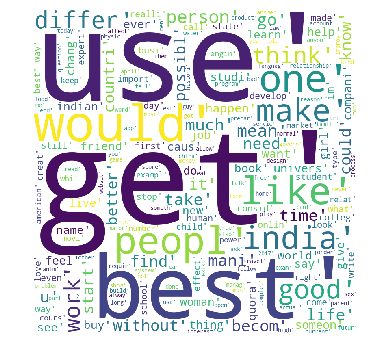

In [25]:
wordcloud_sincere = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopword, 
                min_font_size = 10).generate(str(sincere_1lakh))
plt.figure(figsize = (5, 8), facecolor = None) 
plt.imshow(wordcloud_sincere) 
plt.axis("off") 
plt.tight_layout(pad = 0)  
plt.show() 

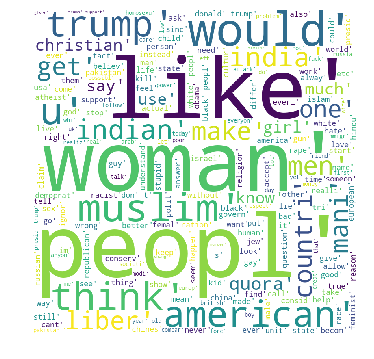

In [29]:
#FOR INSINCERE QUESTIONS FOR ALL THE INSINCERE QUESTIONS#
insincere_questions=[stopword_removed_questions[i] for i in insincere_questions_index]
insincere_questions=cleaning(insincere_questions)
wordcloud_sincere = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopword, 
                min_font_size = 10).generate(str(insincere_questions))
plt.figure(figsize = (5, 8), facecolor = None) 
plt.imshow(wordcloud_sincere) 
plt.axis("off") 
plt.tight_layout(pad = 0)  
plt.show() 


# WORD BANK

In [30]:
words=[]
for question in stopword_removed_questions:
    for word in question.split():
        words.append(word)
word_bank=set(words)

In [32]:
wordnet_lemmatizer = WordNetLemmatizer()
snowball_stemmer = SnowballStemmer('english')
l=[]
for word in word_bank:
    a=wordnet_lemmatizer.lemmatize(word)
    b=snowball_stemmer.stem(word)
    l.append(b)
l2=[]
for word in l:
    w=''.join([a for a in word if a not in punctuation])
    l2.append(w)
word_bank=l2    

# USING COUNT VECTORIZER,WE WILL FORM A MATRIX OF FEATURES,WHICH WE WILL FIT TO LOGISTIC REGRESSION

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(stopword_removed_questions,targets,test_size=0.25)

In [40]:
#COUNT VECOTRIZER#
count_vectorizer=CountVectorizer()
count_vectorizer.fit(word_bank)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [41]:
#TRAINING ON 2LAKH QUESTIONS#
clean_2lakhs=cleaning(X_train[:200000])

In [43]:
train=count_vectorizer.transform(str(question) for question in clean_2lakhs)

In [44]:
target=[Y_train[i][0] for i in range(200000)]

In [48]:
#LOGISTIC REGRESSION#
logreg = LogisticRegression(class_weight='balanced',max_iter=200)
logreg.fit(train, target)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=200,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [51]:
#TESTING THE MODEL#
clean_50k=cleaning(X_test[:50000])
test_matrix=count_vectorizer.transform(str(question) for question in clean_50k)

In [52]:
y_actual=[Y_test[i][0] for i in range(50000)]

In [53]:
y_predicted= logreg.predict(test_matrix)

In [54]:
result=confusion_matrix(y_actual,y_predicted)
result

array([[43086,  3764],
       [  712,  2438]], dtype=int64)